In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as scistat
import statsmodels.api as sm

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_agb_dbg_tile.csv"

In [3]:
df = pd.read_csv(csv_file, parse_dates=['date'])
# set uid to index
df.set_index("uid_x", inplace=True)
df.shape

(180, 100)

In [6]:
df.columns

Index(['site', 'bio_agb_kg1ha', 'b1_dbg_min', 'b1_dbg_max', 'b1_dbg_mean',
       'b1_dbg_med', 'b1_dbg_std', 'b1_dbg_p25', 'b1_dbg_p50', 'b1_dbg_p75',
       'b1_dbg_p95', 'b1_dbg_p99', 'b2_dbg_min', 'b2_dbg_max', 'b2_dbg_mean',
       'b2_dbg_med', 'b2_dbg_std', 'b2_dbg_p25', 'b2_dbg_p50', 'b2_dbg_p75',
       'b2_dbg_p95', 'b2_dbg_p99', 'b3_dbg_min', 'b3_dbg_max', 'b3_dbg_mean',
       'b3_dbg_med', 'b3_dbg_std', 'b3_dbg_p25', 'b3_dbg_p50', 'b3_dbg_p75',
       'b3_dbg_p95', 'b3_dbg_p99', 'b4_dbg_min', 'b4_dbg_max', 'b4_dbg_mean',
       'b4_dbg_med', 'b4_dbg_std', 'b4_dbg_p25', 'b4_dbg_p50', 'b4_dbg_p75',
       'b4_dbg_p95', 'b4_dbg_p99', 'b5_dbg_min', 'b5_dbg_max', 'b5_dbg_mean',
       'b5_dbg_med', 'b5_dbg_std', 'b5_dbg_p25', 'b5_dbg_p50', 'b5_dbg_p75',
       'b5_dbg_p95', 'b5_dbg_p99', 'b6_dbg_min', 'b6_dbg_max', 'b6_dbg_mean',
       'b6_dbg_med', 'b6_dbg_std', 'b6_dbg_p25', 'b6_dbg_p50', 'b6_dbg_p75',
       'b6_dbg_p95', 'b6_dbg_p99'],
      dtype='object')

In [5]:
# drop unwanted columns
df.drop(['date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 
         'bio_s_kg1ha', 'bio_r_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 
         'c_r_kg1ha', 'c_agb_kg1ha', 'basal_dt', 'uid_y', 'image', 'year', 'month', 'day', 'b1_dbg_count', 'b2_dbg_count',
         'b3_dbg_count','b4_dbg_count','b5_dbg_count','b6_dbg_count', 'b1_dbg_range', 'b2_dbg_range', 'b3_dbg_range', 
         'b4_dbg_range', 'b5_dbg_range', 'b6_dbg_range', 'im_date', 'image_dt'], axis=1, inplace=True)

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
df.index.nunique()

49

In [9]:
df.sample(8, random_state=2).T

uid_x,103,55,177,57,14,169,119,2
site,legu05,girra01,NTTDAC0001,hsf01,auv06,NTAPCK0001,NTAARP0002,girra02
bio_agb_kg1ha,4724,17994.8,129.36,25701.7,0,989.555,1157.05,3123.12
b1_dbg_min,398,83,174,276,769,413,412,183
b1_dbg_max,446,133,229,370,810,469,463,259
b1_dbg_mean,425.889,99.7778,201.5,324.417,790.583,442.583,434,219.111
...,...,...,...,...,...,...,...,...
b6_dbg_p25,1568,793,710.25,423,2973,1241.25,1904,986
b6_dbg_p50,1617,802,724.5,438.5,3027.5,1282.5,2058,1000
b6_dbg_p75,1625,857,738.75,479.75,3075.5,1325.25,2068,1050
b6_dbg_p95,1651.2,864.6,750.15,502.45,3116.45,1387.65,2102,1081.2


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())

       bio_agb_kg1ha  b1_dbg_min  b1_dbg_max  b1_dbg_mean  b1_dbg_med  \
count   4.900000e+01   49.000000   49.000000    49.000000   49.000000   
mean    7.966220e+05  410.673469  489.204082   448.795979  447.938776   
std     3.131921e+06  166.923309  175.042254   171.946333  173.834531   
min     0.000000e+00   43.000000  118.000000    68.583333   61.500000   
25%     1.293600e+02  312.000000  401.000000   351.750000  351.000000   
50%     1.349040e+03  425.000000  491.000000   469.166667  467.500000   
75%     5.778080e+03  502.000000  594.000000   549.666667  543.000000   
max     1.293471e+07  769.000000  935.000000   835.833333  834.500000   

       b1_dbg_std  b1_dbg_p25  b1_dbg_p50  b1_dbg_p75  b1_dbg_p95  b1_dbg_p99  \
count   49.000000   49.000000   49.000000   49.000000   49.000000   49.000000   
mean    24.814082  431.974490  447.938776  466.816327  483.360204  488.035306   
std     13.758033  172.014158  173.834531  172.539826  174.298279  174.872750   
min      9.038114 

In [17]:
key_var = ['bio_agb_kg1ha', 'b1_dbg_mean', 'b1_dbg_med', 'b2_dbg_mean', 'b2_dbg_med', 'b3_dbg_mean', 'b3_dbg_med',
          'b4_dbg_mean', 'b4_dbg_med', 'b5_dbg_mean', 'b5_dbg_med', 'b6_dbg_mean', 'b6_dbg_med']

In [18]:
df_key = df[key_var]

In [19]:
df_key

,bio_agb_kg1ha,b1_dbg_mean,b1_dbg_med,b2_dbg_mean,b2_dbg_med,b3_dbg_mean,b3_dbg_med,b4_dbg_mean,b4_dbg_med,b5_dbg_mean,b5_dbg_med,b6_dbg_mean,b6_dbg_med
uid_x,,,,,,,,,,,,,
52,0.000000e+00,542.777778,537.0,669.777778,657.0,756.000000,753.0,1778.666667,1784.0,1930.555556,1933.0,1278.111111,1289.0
132,1.293600e+03,533.444444,531.0,852.333333,848.0,1099.444444,1113.0,2020.222222,2024.0,2165.000000,2168.0,1461.555556,1462.0
133,2.587200e+02,469.250000,473.5,658.500000,662.5,753.250000,749.0,1590.250000,1594.0,2178.500000,2179.5,1382.250000,1371.0
134,1.796667e+03,499.250000,493.5,711.916667,711.5,813.166667,807.5,1797.666667,1802.5,2153.000000,2155.0,1365.750000,1367.0
135,3.880800e+02,574.250000,572.0,790.500000,788.5,896.875000,892.5,1913.125000,1906.0,2308.500000,2266.5,1511.375000,1539.0
137,1.293600e+02,491.000000,498.0,709.583333,724.0,888.166667,902.5,1778.166667,1781.0,2639.500000,2707.5,1791.166667,1808.0
136,1.164240e+03,547.416667,540.0,800.583333,781.0,1004.833333,982.0,2122.416667,2095.5,3014.916667,3065.0,2011.333333,2057.5
138,2.587200e+02,584.333333,593.0,758.000000,756.0,963.000000,950.0,2281.333333,2288.0,2479.000000,2464.0,1820.333333,1837.0
139,1.293471e+07,329.750000,328.0,486.062500,473.0,575.937500,558.5,1678.625000,1677.0,2091.812500,2120.5,1097.062500,1066.0


In [20]:
df_key.describe()

,bio_agb_kg1ha,b1_dbg_mean,b1_dbg_med,b2_dbg_mean,b2_dbg_med,b3_dbg_mean,b3_dbg_med,b4_dbg_mean,b4_dbg_med,b5_dbg_mean,b5_dbg_med,b6_dbg_mean,b6_dbg_med
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000
mean,7.966220e+05,448.795979,447.938776,641.214124,640.704082,876.943165,878.071429,1959.258248,1959.540816,2326.208698,2333.724490,1620.149514,1625.55102
std,3.131921e+06,171.946333,173.834531,240.958012,239.579447,396.347426,399.265928,433.933558,438.392291,721.994933,726.039062,832.052769,837.47469
min,0.000000e+00,68.583333,61.500000,209.444444,211.000000,225.500000,222.500000,624.111111,616.000000,1035.416667,1028.500000,405.333333,413.00000
25%,1.293600e+02,351.750000,351.000000,411.222222,410.500000,551.166667,552.000000,1778.166667,1781.000000,1930.555556,1933.000000,1097.062500,1066.00000
50%,1.349040e+03,469.166667,467.500000,657.111111,657.000000,869.583333,865.000000,2020.500000,2024.000000,2231.222222,2229.000000,1511.375000,1539.00000
75%,5.778080e+03,549.666667,543.000000,786.888889,777.000000,1099.444444,1113.000000,2221.750000,2209.500000,2834.333333,2817.000000,2011.333333,2057.50000
max,1.293471e+07,835.833333,834.500000,1223.250000,1224.500000,1739.111111,1769.500000,2770.666667,2838.500000,4245.583333,4373.000000,4021.222222,4036.00000


Substantial differences between the mean and median, as an indication of skewness.

The interquartile range is also the target value, with the 75th percentile value being about 800 times larger than the 25th percentile value (9210.71, 18.48). We can compare that with the band median and means; b2 has the largest distribution and woyld likly be better at explaining the differences with the target vale; however, the 75th percentile value being about 5 times larger than the 25th percentile vale (55, 11).

In [21]:
df_key.quantile(np.arange(0.0, 1.1, 0.1))

,bio_agb_kg1ha,b1_dbg_mean,b1_dbg_med,b2_dbg_mean,b2_dbg_med,b3_dbg_mean,b3_dbg_med,b4_dbg_mean,b4_dbg_med,b5_dbg_mean,b5_dbg_med,b6_dbg_mean,b6_dbg_med
0.0,0.000000e+00,68.583333,61.5,209.444444,211.0,225.500000,222.5,624.111111,616.0,1035.416667,1028.5,405.333333,413.0
0.1,0.000000e+00,209.188889,199.4,376.666667,378.2,360.577778,362.4,1497.766667,1496.2,1309.783333,1308.3,563.853333,540.9
0.2,4.435200e+01,336.366667,335.8,401.733333,407.0,534.844444,538.2,1748.266667,1753.2,1844.366667,1887.8,938.266667,980.8
0.3,3.104640e+02,375.030556,372.7,485.825000,482.8,604.627778,600.6,1810.155556,1811.9,2091.937500,2104.0,1200.177778,1199.4
0.4,9.809027e+02,417.844444,423.0,601.000000,590.2,786.391667,777.8,1952.177778,1947.2,2172.500000,2173.9,1383.311111,1373.3
0.5,1.349040e+03,469.166667,467.5,657.111111,657.0,869.583333,865.0,2020.500000,2024.0,2231.222222,2229.0,1511.375000,1539.0
0.6,2.986368e+03,488.383333,490.8,672.755556,674.8,940.555556,939.4,2085.400000,2094.8,2390.380556,2377.0,1785.666667,1796.6
0.7,4.578678e+03,539.444444,534.6,756.711111,754.0,1053.711111,1056.8,2124.166667,2132.1,2663.666667,2678.6,1992.444444,2016.0
0.8,1.036063e+04,578.283333,579.2,797.966667,792.3,1128.200000,1137.0,2285.733333,2283.2,2867.866667,2887.6,2085.800000,2083.8
0.9,2.588861e+04,631.597222,636.1,920.711111,927.0,1376.644444,1388.2,2440.705556,2447.2,3094.733333,3087.8,2400.955556,2396.7


Normal distributions are distributed symmetrically (have low skew), and that they have relatively normal tails (neither excessively high nor excessively low kurtosis).

Expect a value near 0 for skew and 3 for kurtosis

In [22]:
df_key.skew()

bio_agb_kg1ha    3.776979
b1_dbg_mean     -0.137325
b1_dbg_med      -0.144978
b2_dbg_mean      0.453712
b2_dbg_med       0.456889
b3_dbg_mean      0.442768
b3_dbg_med       0.458111
b4_dbg_mean     -1.211525
b4_dbg_med      -1.182572
b5_dbg_mean      0.330598
b5_dbg_med       0.379312
b6_dbg_mean      0.891501
b6_dbg_med       0.899555
dtype: float64

In [23]:
df_key.kurtosis()

bio_agb_kg1ha    12.786333
b1_dbg_mean       0.035982
b1_dbg_med       -0.013151
b2_dbg_mean      -0.033405
b2_dbg_med        0.006130
b3_dbg_mean      -0.320574
b3_dbg_med       -0.286954
b4_dbg_mean       2.524300
b4_dbg_med        2.573915
b5_dbg_mean       0.299340
b5_dbg_med        0.475821
b6_dbg_mean       1.043698
b6_dbg_med        1.071910
dtype: float64

### Shapiro-Wilk test

Shapiro-Wilk test on the distribution.
P-values less than 0.05 indicate that we can reject the null hypothesis of normal distribution.

Note: non normal distribution may limit the models (i.e. linear regression)

In [24]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value=", '{:.6f}'.format(p))

feature= b1_dbg_mean      p-value= 0.667455
feature= b1_dbg_med      p-value= 0.589070
feature= b2_dbg_mean      p-value= 0.120534
feature= b2_dbg_med      p-value= 0.141347
feature= b3_dbg_mean      p-value= 0.122677
feature= b3_dbg_med      p-value= 0.139230
feature= b4_dbg_mean      p-value= 0.001123
feature= b4_dbg_med      p-value= 0.001106
feature= b5_dbg_mean      p-value= 0.280458
feature= b5_dbg_med      p-value= 0.242445
feature= b6_dbg_mean      p-value= 0.005983
feature= b6_dbg_med      p-value= 0.004913


## Identifying extreme values and outliers in univariate analysis

In [25]:
df_key

,bio_agb_kg1ha,b1_dbg_mean,b1_dbg_med,b2_dbg_mean,b2_dbg_med,b3_dbg_mean,b3_dbg_med,b4_dbg_mean,b4_dbg_med,b5_dbg_mean,b5_dbg_med,b6_dbg_mean,b6_dbg_med
uid_x,,,,,,,,,,,,,
52,0.000000e+00,542.777778,537.0,669.777778,657.0,756.000000,753.0,1778.666667,1784.0,1930.555556,1933.0,1278.111111,1289.0
132,1.293600e+03,533.444444,531.0,852.333333,848.0,1099.444444,1113.0,2020.222222,2024.0,2165.000000,2168.0,1461.555556,1462.0
133,2.587200e+02,469.250000,473.5,658.500000,662.5,753.250000,749.0,1590.250000,1594.0,2178.500000,2179.5,1382.250000,1371.0
134,1.796667e+03,499.250000,493.5,711.916667,711.5,813.166667,807.5,1797.666667,1802.5,2153.000000,2155.0,1365.750000,1367.0
135,3.880800e+02,574.250000,572.0,790.500000,788.5,896.875000,892.5,1913.125000,1906.0,2308.500000,2266.5,1511.375000,1539.0
137,1.293600e+02,491.000000,498.0,709.583333,724.0,888.166667,902.5,1778.166667,1781.0,2639.500000,2707.5,1791.166667,1808.0
136,1.164240e+03,547.416667,540.0,800.583333,781.0,1004.833333,982.0,2122.416667,2095.5,3014.916667,3065.0,2011.333333,2057.5
138,2.587200e+02,584.333333,593.0,758.000000,756.0,963.000000,950.0,2281.333333,2288.0,2479.000000,2464.0,1820.333333,1837.0
139,1.293471e+07,329.750000,328.0,486.062500,473.0,575.937500,558.5,1678.625000,1677.0,2091.812500,2120.5,1097.062500,1066.0


In [26]:
var_ = "bio_agb_kg1ha"

In [27]:
thirdq, firstq = df_key[var_].quantile(0.75), df_key[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-8343.72 <--> 14251.16


In [28]:
df.loc[df[var_]>extvalhigh].T

uid_x,139,140,55,56,57,58,54,1,165
site,NTAGFU0017,NTAGFU0018,girra01,hshr01,hsf01,hsf02,ep01,lit01,NTAMGD0002
bio_agb_kg1ha,1.29347e+07,1.29347e+07,17994.8,35199.7,25701.7,26636.3,18757.2,25585.1,1.29347e+07
b1_dbg_min,292,292,83,97,276,295,317,43,713
b1_dbg_max,395,421,133,149,370,390,407,118,801
b1_dbg_mean,329.75,350.5,99.7778,118.857,324.417,340.778,359.5,68.5833,747.444
...,...,...,...,...,...,...,...,...,...
b6_dbg_p25,978,743,793,396.5,423,471,492.25,377.75,3954
b6_dbg_p50,1066,1042,802,436,438.5,485,500.5,413,4036
b6_dbg_p75,1170.75,1121.25,857,463,479.75,542,514,436.5,4082
b6_dbg_p95,1324.5,1156.3,864.6,499.6,502.45,554.2,592.55,472.2,4128.4


The Howard Springs outliers may be explained by the dense woody veg

In [29]:
df.mean()

bio_agb_kg1ha    796622.020492
b1_dbg_min          410.673469
b1_dbg_max          489.204082
b1_dbg_mean         448.795979
b1_dbg_med          447.938776
                     ...      
b6_dbg_p25         1554.010204
b6_dbg_p50         1625.551020
b6_dbg_p75         1679.903061
b6_dbg_p95         1739.200000
b6_dbg_p99         1752.231837
Length: 61, dtype: float64

In [30]:
df_out = df.loc[df[var_]<extvalhigh]

In [31]:
df_out.shape

(40, 62)

In [32]:
df_key_out = df_key.loc[df_key[var_]<extvalhigh]

In [33]:
df_key_out.shape

(40, 13)

In [34]:
df_out.mean()

bio_agb_kg1ha    2012.126978
b1_dbg_min        442.875000
b1_dbg_max        519.675000
b1_dbg_mean       481.284896
b1_dbg_med        480.762500
                    ...     
b6_dbg_p25       1687.950000
b6_dbg_p50       1760.825000
b6_dbg_p75       1816.225000
b6_dbg_p95       1878.150000
b6_dbg_p99       1892.370000
Length: 61, dtype: float64

In [39]:
def getextremevalues(dfin):
    
    dfout = pd.DataFrame(columns=dfin.columns, data=None)
    for col in dfin.columns[1:]:
        thirdq, firstq = dfin[col].quantile(0.75), dfin[col].quantile(0.25)
        interquartilerange = 1.5*(thirdq-firstq)
        extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
        #print(extvalhigh, extvallow)
        
        extreme_df = dfin.loc[(dfin[col]>extvalhigh) | (dfin[col]<extvallow)]
        print(extreme_df)
        print(list(extreme_df))
        


In [40]:
getextremevalues(df_key)

Empty DataFrame
Columns: [bio_agb_kg1ha, b1_dbg_mean, b1_dbg_med, b2_dbg_mean, b2_dbg_med, b3_dbg_mean, b3_dbg_med, b4_dbg_mean, b4_dbg_med, b5_dbg_mean, b5_dbg_med, b6_dbg_mean, b6_dbg_med]
Index: []
['bio_agb_kg1ha', 'b1_dbg_mean', 'b1_dbg_med', 'b2_dbg_mean', 'b2_dbg_med', 'b3_dbg_mean', 'b3_dbg_med', 'b4_dbg_mean', 'b4_dbg_med', 'b5_dbg_mean', 'b5_dbg_med', 'b6_dbg_mean', 'b6_dbg_med']
       bio_agb_kg1ha  b1_dbg_mean  b1_dbg_med  b2_dbg_mean  b2_dbg_med  \
uid_x                                                                    
101             0.00   835.833333       834.5      1223.25      1224.5   
1           25585.07    68.583333        61.5       227.00       226.5   

       b3_dbg_mean  b3_dbg_med  b4_dbg_mean  b4_dbg_med  b5_dbg_mean  \
uid_x                                                                  
101        1716.25      1769.5  2770.666667      2838.5  4245.583333   
1           225.50       222.5  2042.083333      2007.5  1058.500000   

       b5_dbg_med  b6

### QQ plot

Quantile-quantile (Q-Q) plots can improve our sense of that distribution by allowing us to view it graphically relative to a theoretical distribution: normal, uniform, log, or others.

 - Negative skew have an umbrella-like shape
 - Positive skew have a bowl-like shape

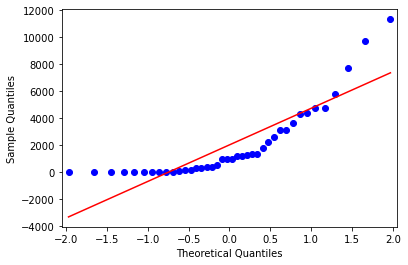

In [37]:
sm.qqplot(df_out[[var_]].sort_values([var_]).dropna(),line='s')
plt.show()

Indicating a positive skew

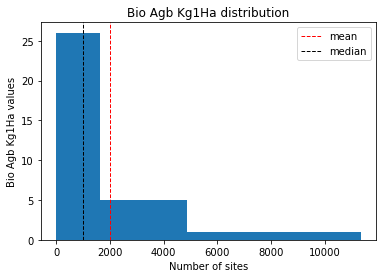

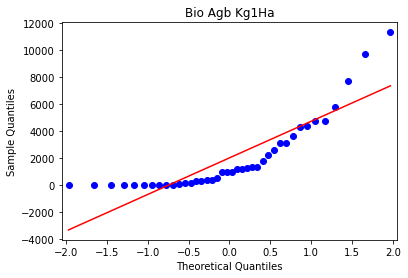

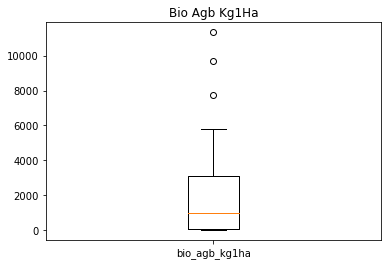

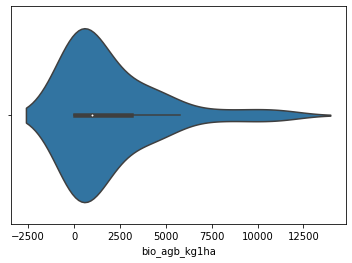

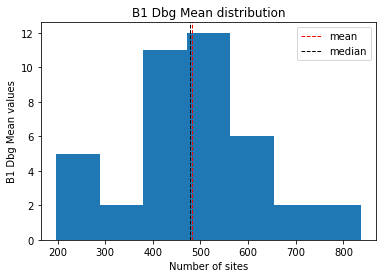

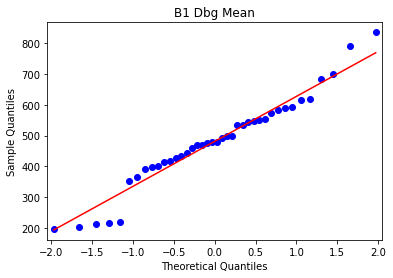

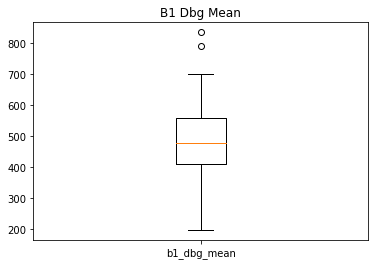

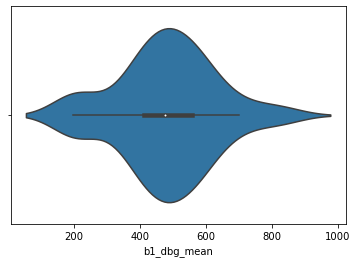

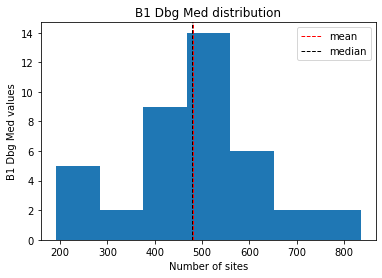

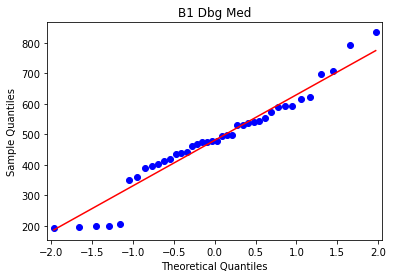

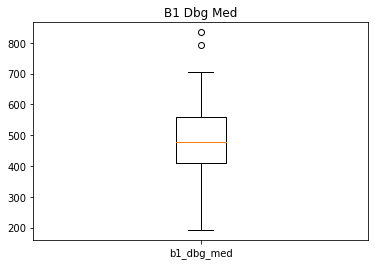

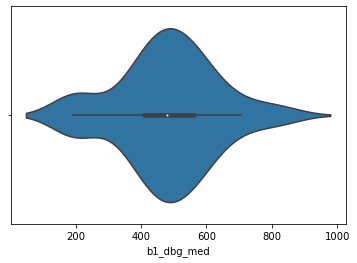

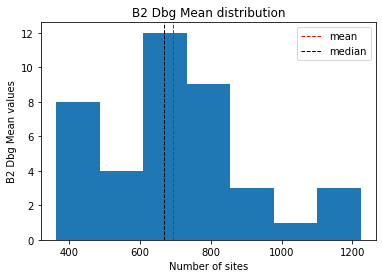

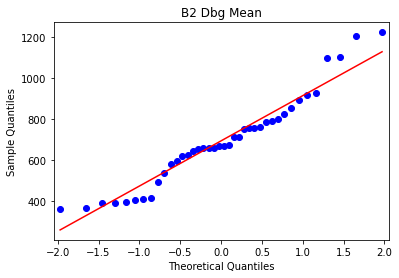

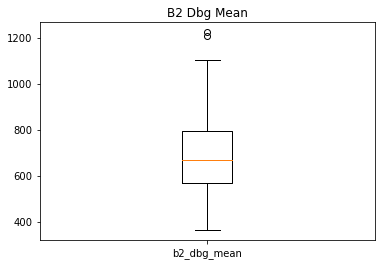

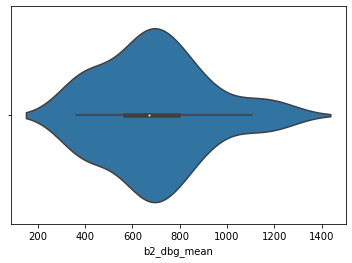

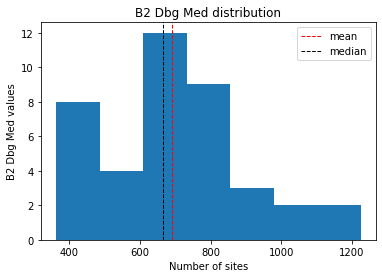

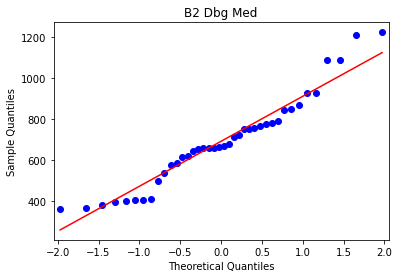

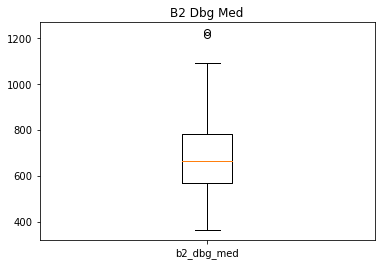

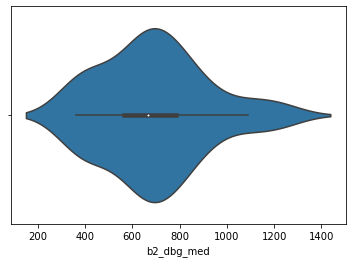

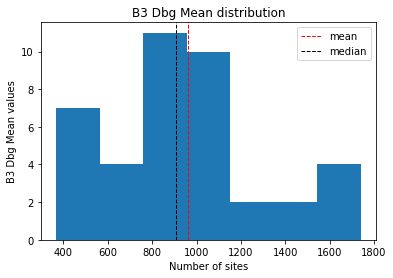

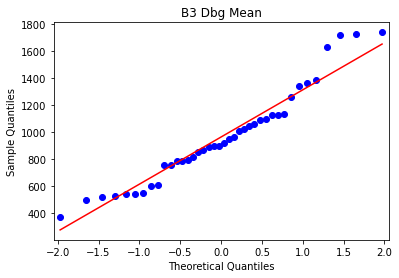

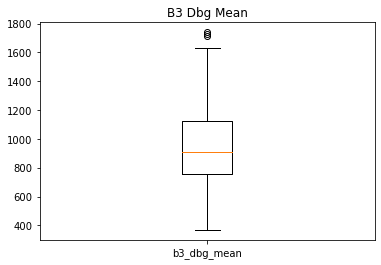

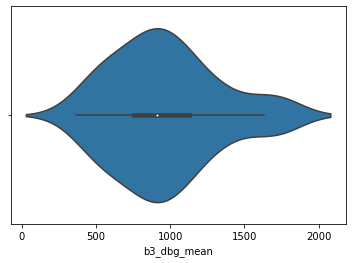

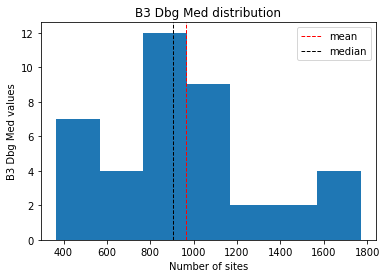

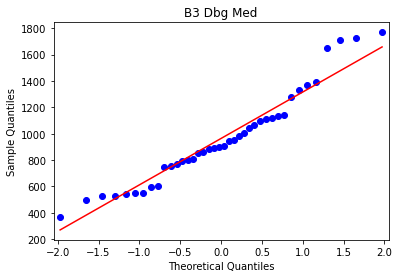

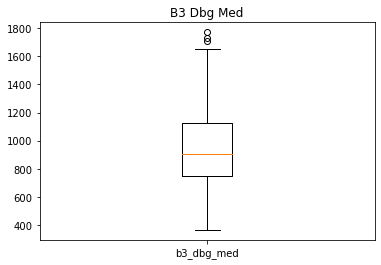

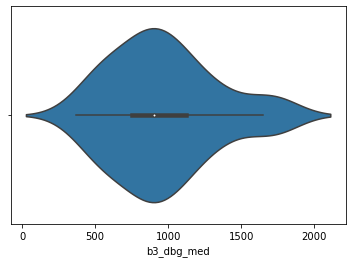

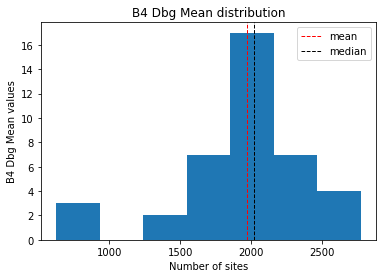

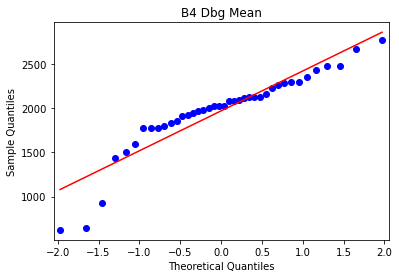

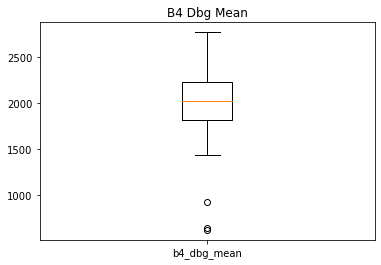

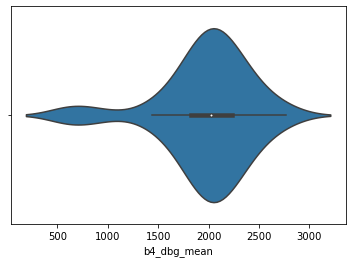

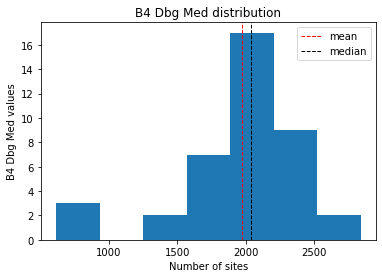

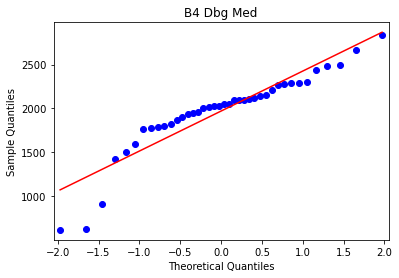

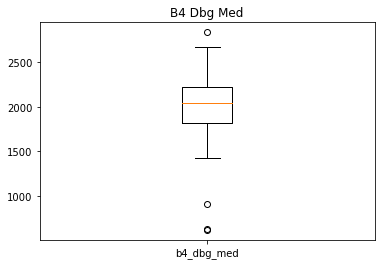

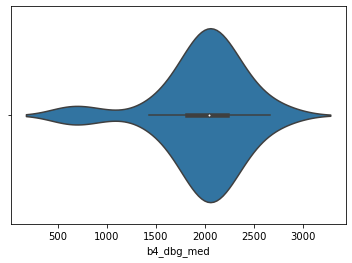

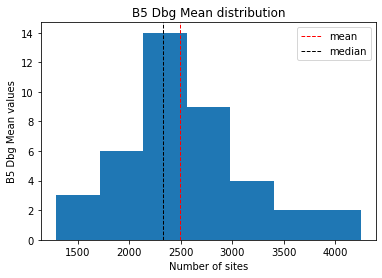

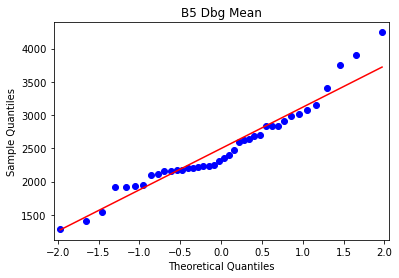

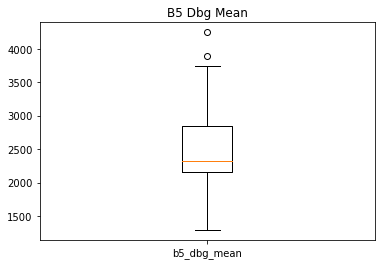

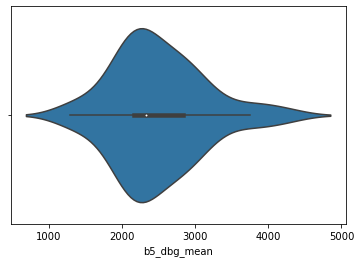

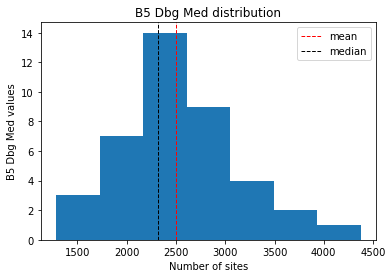

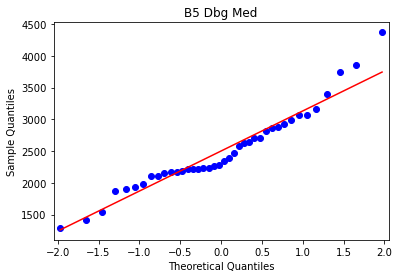

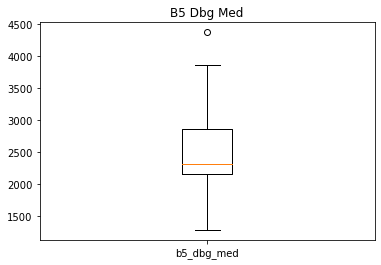

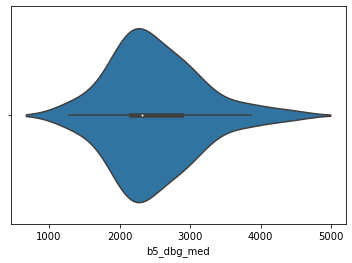

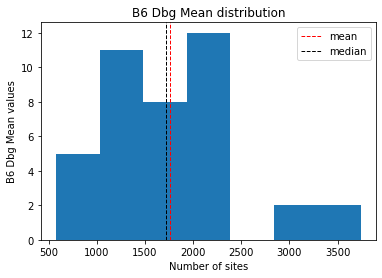

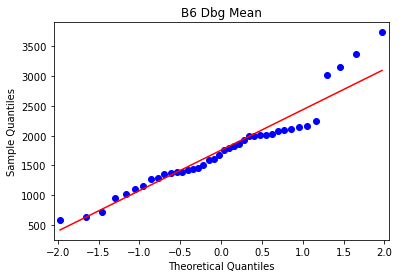

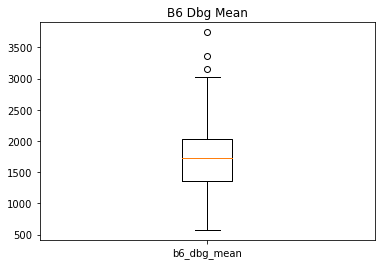

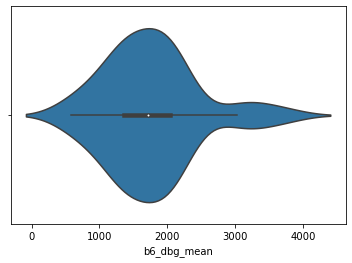

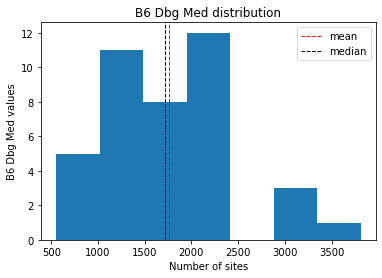

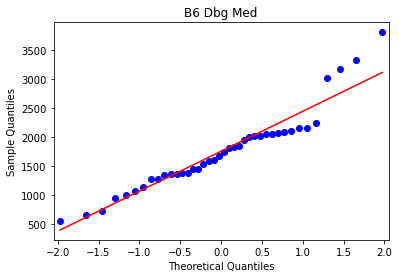

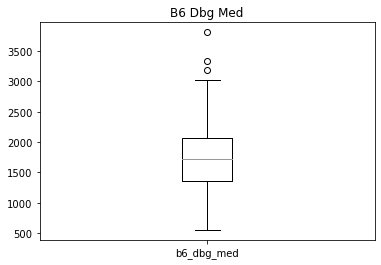

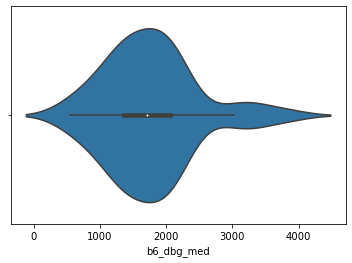

In [38]:
for i in key_var:
    plt.hist(df_out[i], bins=7)
    plt.axvline(df_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_out[i])
    plt.show()
    print("="*50)
    



Violin plot:
 - the black bar with the white dot in the middle is the interquartile range
 - the white dot represents the median.
 - the height at each point (when the violin plot is horizontal) gives us the relative frequency. 
 - the thin black lines to the right/left of the interquartile range are the whiskers 
 - the extreme values are shown in the part of the distribution beyond the whiskers

In [32]:
df_key_out.skew()

bio_agb_kg1ha    1.919313
b1_dp1_mean      2.586491
b1_dp1_med       2.560270
b2_dp1_mean     -0.012588
b2_dp1_med      -0.000691
b3_dp1_mean      0.439592
b3_dp1_med       0.419088
dtype: float64

In [33]:
df_key_out.kurtosis()

bio_agb_kg1ha    3.636135
b1_dp1_mean      9.217958
b1_dp1_med       8.986979
b2_dp1_mean     -1.416690
b2_dp1_med      -1.393043
b3_dp1_mean     -1.258714
b3_dp1_med      -1.255515
dtype: float64

In [34]:
for var in key_var:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value =", '{:.6f}'.format(p))

feature= bio_agb_kg1ha      p-value = 0.000000
feature= b1_dp1_mean      p-value = 0.000000
feature= b1_dp1_med      p-value = 0.000000
feature= b2_dp1_mean      p-value = 0.099906
feature= b2_dp1_med      p-value = 0.093063
feature= b3_dp1_mean      p-value = 0.016174
feature= b3_dp1_med      p-value = 0.016977


In [35]:
thirdq, firstq = df_key_out[var_].quantile(0.75), df_key_out[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-4643.099999999999 <--> 7738.499999999999


In [36]:
df.loc[df[var_]>extvalhigh].T

uid_x,55,56,145,57,58,60,54,105,1
site,girra01,hshr01,NTAGFU0023,hsf01,hsf02,wedo03,ep01,legu07,lit01
bio_agb_kg1ha,17994.8,35199.7,1.29347e+07,25701.7,26636.3,11338.1,18757.2,9708.97,25585.1
b1_dp1_min,1,1,2,1,1,1,2,2,1
b1_dp1_max,28,5,15,5,9,6,4,5,3
b1_dp1_mean,15,3.11111,6.5625,3.58333,4.55556,3,2.5,2.77778,1.33333
b1_dp1_std,9.56847,1.36987,3.65665,1.11492,2.45452,1.45774,0.763763,1.0304,0.62361
b1_dp1_med,12,3,7,3.5,4,3,2,2,1
b1_dp1_p25,9,2,3,3,3,2,2,2,1
b1_dp1_p50,12,3,7,3.5,4,3,2,2,1
b1_dp1_p75,24,4,9,4.25,6,4,3,3,1.25


In [37]:
df_key_out_out = df_key.loc[df_key[var_]<extvalhigh]

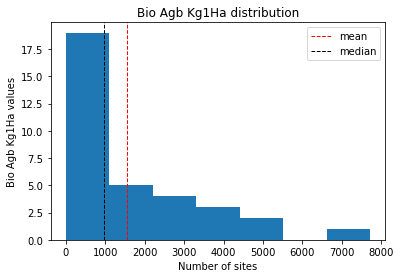

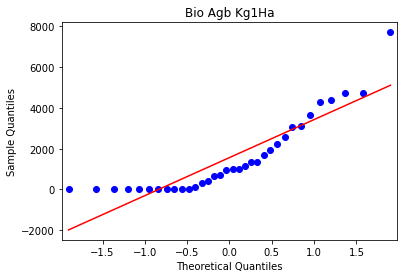

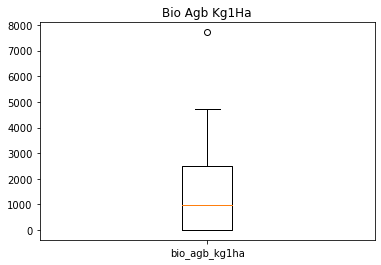

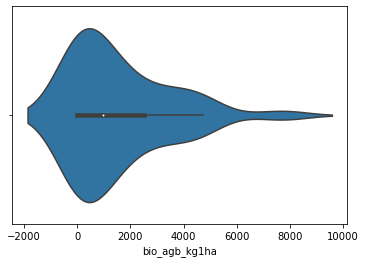

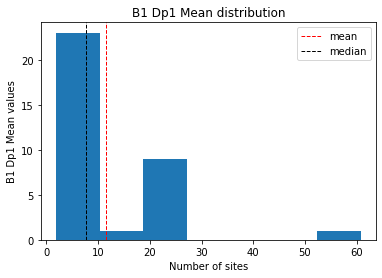

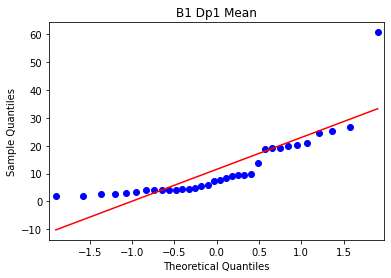

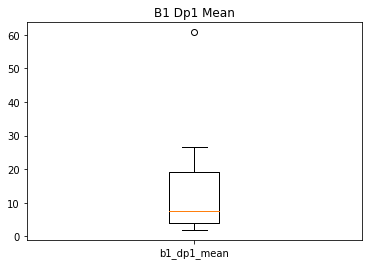

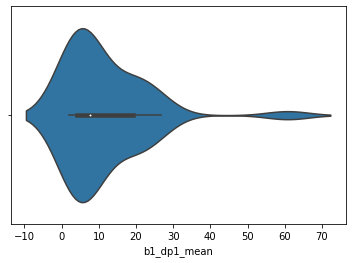

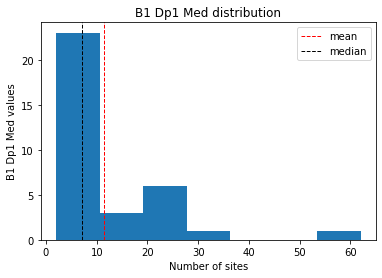

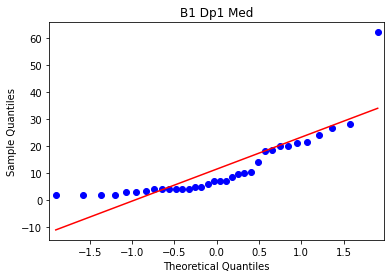

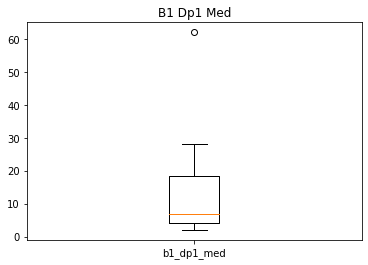

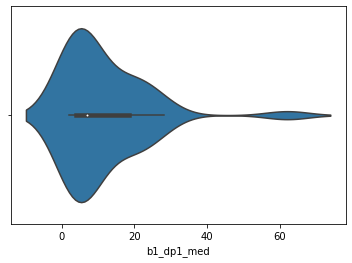

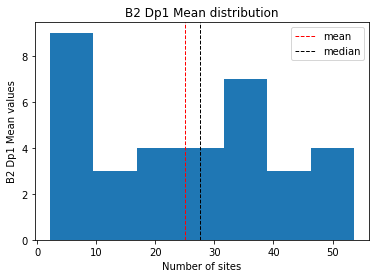

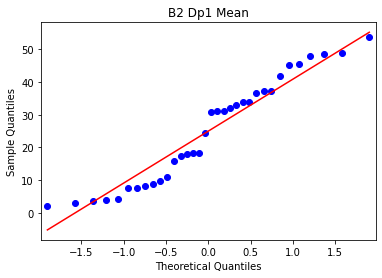

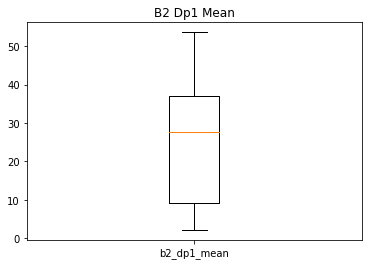

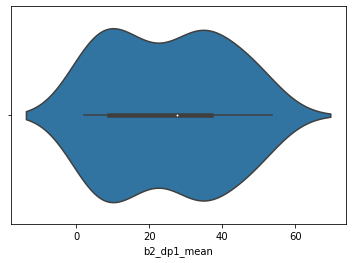

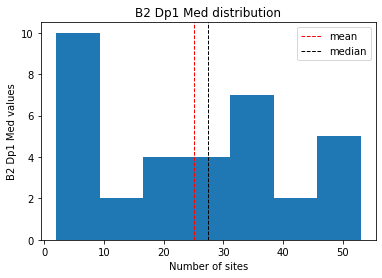

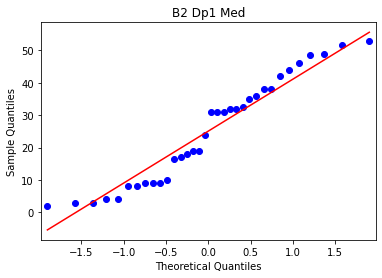

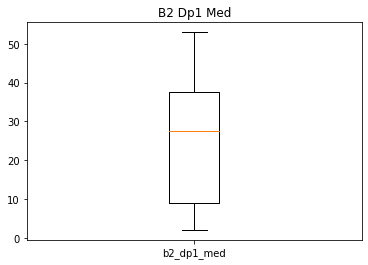

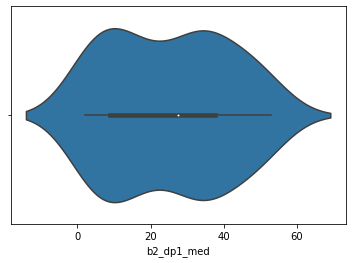

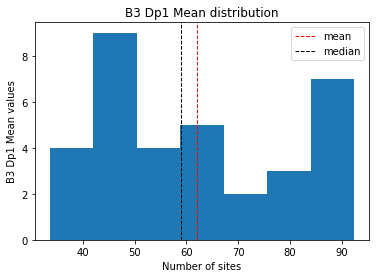

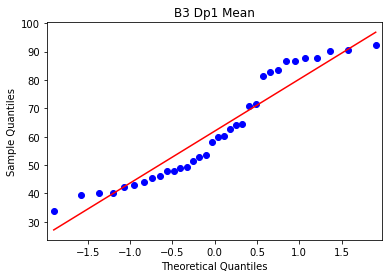

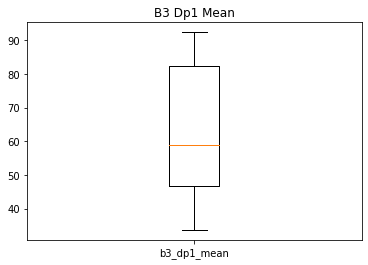

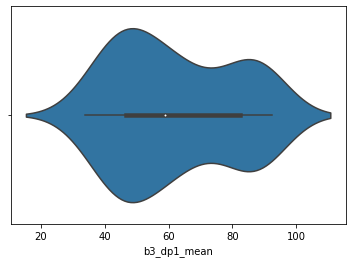

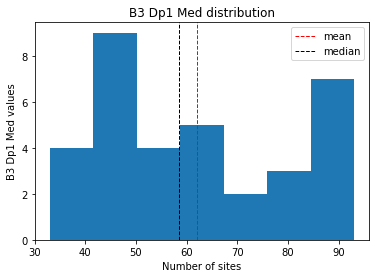

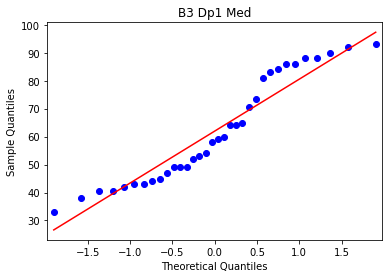

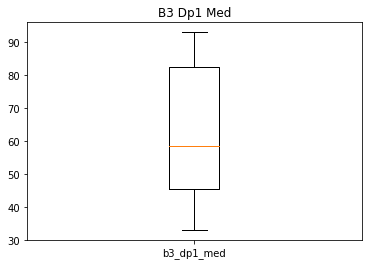

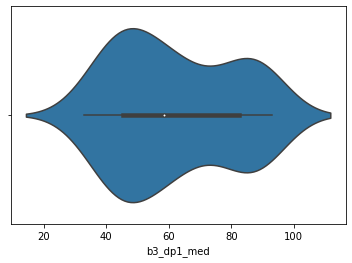

In [38]:
for i in key_var:
    plt.hist(df_key_out_out[i], bins=7)
    plt.axvline(df_key_out_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_key_out_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_key_out_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_key_out_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_key_out_out[i])
    plt.show()
    print("="*50)
    